In [1]:
# import necessary libaries
import pandas as pd
import requests
import os
from dotenv import load_dotenv
%load_ext autoreload
%load_ext sql
%sql sqlite:///stocks.sqlite

%autoreload 2

import sqlite3

import matplotlib.pyplot as plt


In [2]:
# Import `AlphaVantageAPI`
from data import AlphavantageApi


# Create instance of `AlphaVantageAPI` class
av = AlphavantageApi()

print("av type:", type(av))

av type: <class 'data.AlphavantageApi'>


In [3]:
# Define Suzlon ticker symbol
ticker = "SUZLON.BSE"
# Use your `av` object to get daily data
df_suzlon = av.get_daily(ticker=ticker)

print("df_suzlon type:", type(df_suzlon))
print("df_suzlon shape:", df_suzlon.shape)
df_suzlon.head()

df_suzlon type: <class 'pandas.core.frame.DataFrame'>
df_suzlon shape: (4985, 5)


,open,high,low,close,volume
date,,,,,
2026-01-13,49.58,49.70,47.80,48.71,8694711.0
2026-01-12,49.21,49.40,47.90,49.21,11702770.0
2026-01-09,50.59,51.07,48.89,49.20,13631320.0
2026-01-08,52.79,53.40,50.69,50.93,7844493.0
2026-01-07,53.08,53.70,52.67,52.91,4056092.0


In [4]:
#create sqlite connection
connection = sqlite3.connect(database=os.getenv("db_name"), check_same_thread=False)

print("connection type:", type(connection))

connection type: <class 'sqlite3.Connection'>


In [5]:
# Import class definition
from data import SQLRepository

# Create instance of class
repo = SQLRepository(connection=connection)


In [ ]:
ticker = "SUZLON.BSE"
response = repo.insert_table(table_name=ticker, records=df_suzlon, if_exists="replace")


In [7]:
response

{'transaction_successful': True, 'records_inserted': 4985}

In [8]:
# Assign `read_table` output to `df_suzlon`
df_suzlon = repo.read_table(table_name="SUZLON.BSE", limit=2500)  # noQA F821
# Print `df_suzlon` info
print("df_suzlon shape:", df_suzlon.shape)
print()
print(df_suzlon.info())
df_suzlon.head()

df_suzlon shape: (2500, 5)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2500 entries, 2026-01-13 to 2015-11-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2500 non-null   float64
 1   high    2500 non-null   float64
 2   low     2500 non-null   float64
 3   close   2500 non-null   float64
 4   volume  2500 non-null   float64
dtypes: float64(5)
memory usage: 117.2 KB
None


,open,high,low,close,volume
date,,,,,
2026-01-13,49.58,49.70,47.80,48.71,8694711.0
2026-01-12,49.21,49.40,47.90,49.21,11702770.0
2026-01-09,50.59,51.07,48.89,49.20,13631320.0
2026-01-08,52.79,53.40,50.69,50.93,7844493.0
2026-01-07,53.08,53.70,52.67,52.91,4056092.0


In [9]:
ticker = "AMBUJACEM.BSE"

# Get Ambuja data using `av`
ambuja_records = av.get_daily(ticker=ticker)

# Insert `ambuja_records` database using `repo`
response = repo.insert_table(
    table_name=ticker,records=ambuja_records,if_exists="replace"
    
)

response

{'transaction_successful': True, 'records_inserted': 5180}

In [10]:
ticker = "AMBUJACEM.BSE"
df_ambuja = repo.read_table(table_name=ticker, limit=2500)

print("df_ambuja type:", type(df_ambuja))
print("df_ambuja shape:", df_ambuja.shape)
df_ambuja.head()

df_ambuja type: <class 'pandas.core.frame.DataFrame'>
df_ambuja shape: (2500, 5)


,open,high,low,close,volume
date,,,,,
2026-01-13,538.75,545.45,533.95,537.65,23288.0
2026-01-12,535.45,540.45,528.50,538.55,87880.0
2026-01-09,545.65,548.25,535.60,536.95,68041.0
2026-01-08,561.80,561.85,545.50,546.95,47801.0
2026-01-07,563.50,565.15,560.75,561.80,29575.0


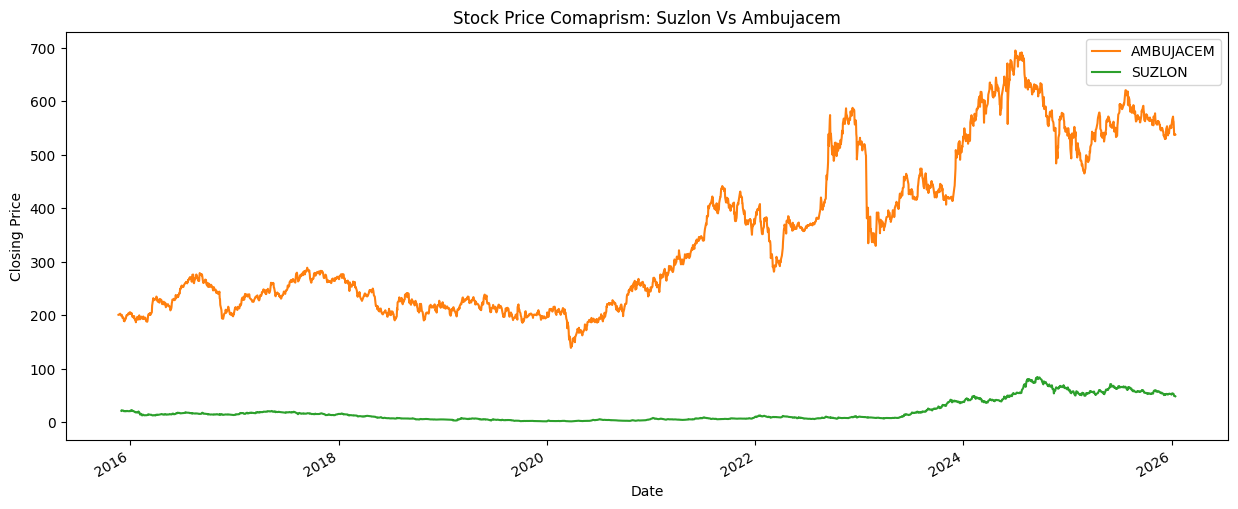

In [16]:
fig, ax = plt.subplots(figsize=(15, 6))
# Plot `df_ambuja` closing price
df_ambuja["close"].plot(ax=ax, label="AMBUJACEM", color="C1")
df_suzlon["close"].plot(ax=ax, label="SUZLON", color="C2")

# Label axes
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Stock Price Comaprism: Suzlon Vs Ambujacem")

# Add legend
plt.legend();

In [12]:
# Sort DataFrame ascending by date
df_ambuja.sort_index(ascending=True, inplace=True)

# Create "return" column
df_ambuja["return"] = df_ambuja["close"].pct_change() * 100

print("df_ambuja shape:", df_ambuja.shape)
print(df_ambuja.info())
df_ambuja.head()

df_ambuja shape: (2500, 6)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2500 entries, 2015-11-20 to 2026-01-13
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2500 non-null   float64
 1   high    2500 non-null   float64
 2   low     2500 non-null   float64
 3   close   2500 non-null   float64
 4   volume  2500 non-null   float64
 5   return  2499 non-null   float64
dtypes: float64(6)
memory usage: 136.7 KB
None


,open,high,low,close,volume,return
date,,,,,,
2015-11-20,198.75,202.90,198.35,200.90,1157585.0,NaN
2015-11-23,203.00,203.50,199.75,201.25,179025.0,0.174216
2015-11-24,201.00,204.95,201.00,202.35,503605.0,0.546584
2015-11-26,201.90,204.40,201.40,203.05,70755.0,0.345935
2015-11-27,202.95,205.00,200.85,201.90,59665.0,-0.566363


In [13]:
# Sort DataFrame ascending by date
df_suzlon.sort_index(ascending=True, inplace=True)

# Create "return" column
df_suzlon["return"] = df_suzlon["close"].pct_change() * 100

print("df_suzlon shape:", df_suzlon.shape)
print(df_suzlon.info())
df_suzlon.head()

df_suzlon shape: (2500, 6)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2500 entries, 2015-11-30 to 2026-01-13
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2500 non-null   float64
 1   high    2500 non-null   float64
 2   low     2500 non-null   float64
 3   close   2500 non-null   float64
 4   volume  2500 non-null   float64
 5   return  2499 non-null   float64
dtypes: float64(6)
memory usage: 136.7 KB
None


,open,high,low,close,volume,return
date,,,,,,
2015-11-30,21.85,21.95,21.60,21.65,4609160.0,NaN
2015-12-01,22.10,23.10,21.90,22.70,17562140.0,4.849885
2015-12-02,22.70,22.80,22.25,22.30,5175979.0,-1.762115
2015-12-03,22.40,22.90,22.20,22.25,12332590.0,-0.224215
2015-12-04,22.20,22.80,22.10,22.30,6653104.0,0.224719


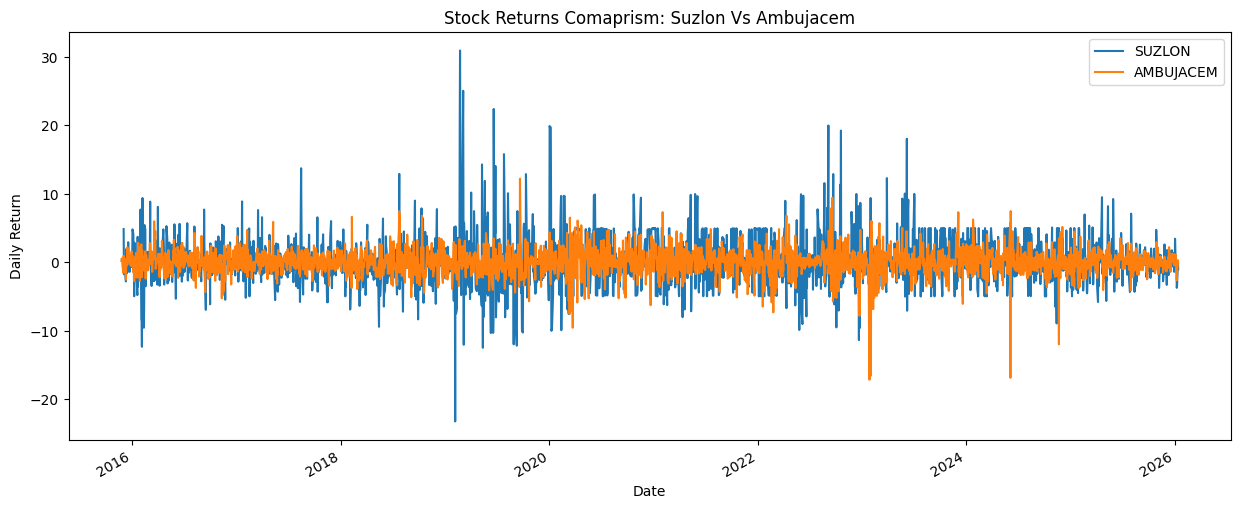

In [15]:
fig, ax = plt.subplots(figsize=(15, 6))
# Plot `df_suzlon` and `df_ambuja`
df_suzlon["return"].plot(ax=ax, label="SUZLON")
df_ambuja["return"].plot(ax=ax, label="AMBUJACEM")


# Label axes
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.title("Stock Returns Comaprism: Suzlon Vs Ambujacem")


# Add legend
plt.legend();